In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [139]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [140]:
df.shape

(205, 26)

In [141]:
features = ["enginesize", "horsepower", "curbweight", "citympg", "highwaympg"]
target = ["price"]
x = df[features]
y = np.log(df["price"])
x = x.fillna(x.mean())

In [142]:
#replacing the missing values
x=x.fillna(x.mean())
y=y.fillna(y.mean())

In [143]:
# Split data
m = len(df)
split_index = int(0.8 * m)
x_train_raw = x.iloc[:split_index].values
y_train = y.iloc[:split_index].values
x_test_raw = x.iloc[split_index:].values
y_test = y.iloc[split_index:].values


In [144]:
mu = np.mean(x_train_raw, axis=0)
sigma = np.std(x_train_raw, axis=0)
x_train = (x_train_raw - mu) / sigma
x_test = (x_test_raw - mu) / sigma


In [145]:
def predict(x, w, b):
    return np.dot(x, w) + b
def compute_cost(x, y, w, b):
    m = len(y)
    predictions = np.dot(x, w) + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def compute_gradient(x, y, w, b):
    m = len(y)
    predictions = np.dot(x, w) + b
    err = predictions - y
    dj_dw = (1 / m) * np.dot(x.T, err)
    dj_db = (1 / m) * np.sum(err)
    return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, iterations):
    cost_history = []
    iteration_history = []
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i % 100 == 0:
            cost_history.append(compute_cost(x, y, w, b))
            iteration_history.append(i)
    return w, b, cost_history, iteration_history

def get_rmse(x, y_true_log, w, b):
    pred_log = np.dot(x, w) + b
    return np.sqrt(np.mean((np.exp(y_true_log) - np.exp(pred_log)) ** 2))

In [146]:
n = x_train.shape[1]
w_init = np.zeros(n)
b_init = 0.
alpha = 00.1
iterations = 2000

In [147]:
w_final, b_final, cost_history, iteration_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations)

Text(0.5, 1.0, 'Cost vs Iterations')

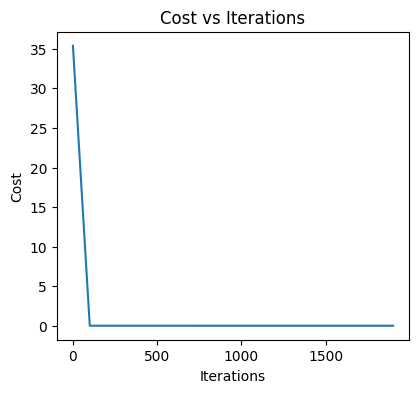

In [148]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(iteration_history, cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")

In [149]:
train_predictions = predict(x_train, w_final, b_final)
test_predictions = predict(x_test, w_final, b_final)

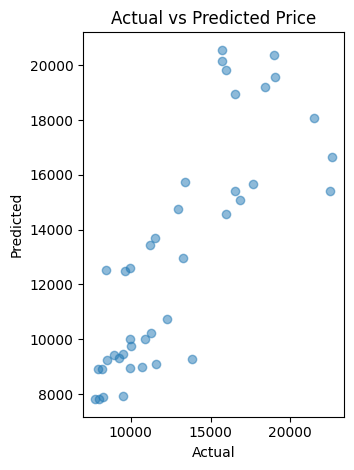

In [150]:
plt.subplot(1, 2, 2)
plt.scatter(np.exp(y_test), np.exp(np.dot(x_test, w_final) + b_final), alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Price")
plt.tight_layout()
plt.show()

In [151]:
print(f"Train RMSE: ${get_rmse(x_train, y_train, w_final, b_final):.2f}")
print(f"Test RMSE: ${get_rmse(x_test, y_test, w_final, b_final):.2f}")

Train RMSE: $4047.54
Test RMSE: $2539.37
